In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize

In [82]:
clean_image = io.imread('imgs\clean.jpeg') / 255.0
adv_image = io.imread('imgs\\bad_prompt_eps8.bmp') / 255.0
print(clean_image.shape)
print(adv_image.shape)

(400, 400, 3)
(224, 224, 3)


In [83]:
target_shape = (224, 224, 3)  
clean_image = resize(clean_image, target_shape, anti_aliasing=True)
adv_image = resize(adv_image, target_shape, anti_aliasing=True)
print("Resized clean image shape:", clean_image.shape)
print("Resized adversarial image shape:", adv_image.shape)

Resized clean image shape: (224, 224, 3)
Resized adversarial image shape: (224, 224, 3)


In [84]:
def apply_ica(image, n_components=3):
    # Reshape the image to combine color channels
    reshaped_image = image.reshape(-1, 3)  # Reshape to (num_pixels, 3)
    
    # Apply ICA
    ica = FastICA(n_components=n_components, random_state=0)
    independent_components = ica.fit_transform(reshaped_image)
    
    # Reshape the components back to the original image shape
    components_reshaped = independent_components.reshape(image.shape[0], image.shape[1], n_components)
    
    return components_reshaped

ica_clean = np.array(apply_ica(clean_image))  # Now returns 3 independent components
ica_adv = np.array(apply_ica(adv_image))


In [85]:
ica_clean.shape

(224, 224, 3)

The sum of the difference for component 0: 65975.41224168519
The sum of the difference for component 1: 12439.364540259341
The sum of the difference for component 2: 19932.194025574096


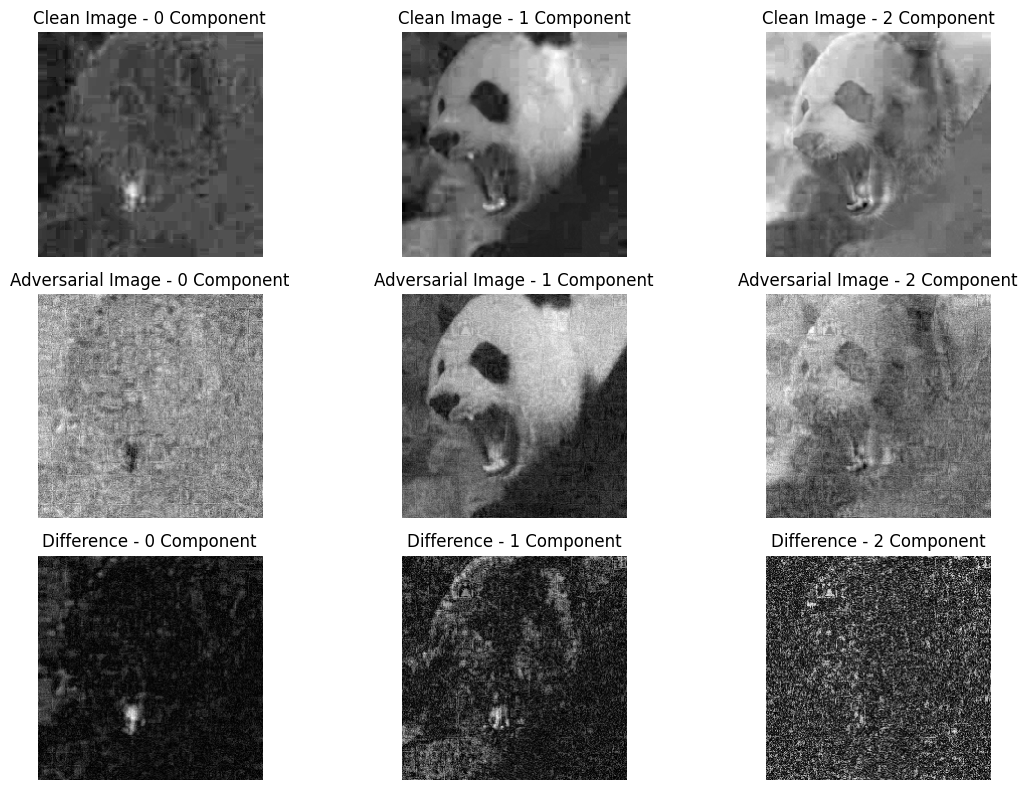

In [86]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

for i in range(3):
    axes[0, i].imshow(ica_clean[:,:,i], cmap='gray')
    axes[0, i].set_title(f'Clean Image - {i} Component')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(ica_adv[:,:,i], cmap='gray')
    axes[1, i].set_title(f'Adversarial Image - {i} Component')
    axes[1, i].axis('off') 
    
    axes[2, i].imshow(abs(ica_clean[:,:,i]- ica_adv[:,:,i]), cmap='gray')
    axes[2, i].set_title(f'Difference - {i} Component')
    axes[2, i].axis('off') 
    print(f"The sum of the difference for component {i}: {sum(sum(abs(ica_clean[:,:,i] - ica_adv[:,:,i])))}")

plt.tight_layout()
plt.show()